In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
# Define the path to the dataset
file_path = '/kaggle/input/titanic/titanic.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm successful loading
print(df.head())


   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Columns Described:
* Survived: Indicator if the passenger survived (1) or not (0).
* Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).
* Age: Age of the passengers.
* Siblings/Spouses Aboard: Number of siblings or spouses aboard.
* Parents/Children Aboard: Number of parents or children aboard.
* Fare: Ticket fare paid by the passenger.

# Statistical Summary Explained:
1. Count (887):
This indicates there are 887 entries in each column, providing a consistent dataset without missing values for these fields.

1. Mean:
 Survived: About 38.56% of the passengers in this sample survived.
 Pclass: The average passenger class is about 2.31, suggesting a higher proportion of lower-class (second and third) passengers.
 Age: The average age is approximately 29.47 years.
 Siblings/Spouses Aboard: On average, passengers had about 0.53 siblings or spouses aboard.
 Parents/Children Aboard: On average, passengers had about 0.38 parents or children aboard.
 Fare: The average fare paid was about $32.31, which varies significantly given the high standard deviation.

1. Standard Deviation (std):
Indicates the variability in each column. Notably, the fare has a high standard deviation (49.78) compared to the mean, indicating a wide range of ticket prices.

1. Minimum (min):
Every minimum value aligns with possible lower bounds for each category, e.g., the youngest passenger was about 0.42 years old, and the minimum fare is $0.00, suggesting some passengers traveled for free.

1. Percentiles (25%, 50%, 75%):
These values give a better sense of the distribution of data:
25%: 25% of passengers did not survive, were in second class, were younger than 20.25 years, and did not have siblings/spouses or parents/children aboard.
50% (Median): Half of the passengers were in third class, were about 28 years old, and similarly did not have siblings/spouses or parents/children aboard. The median fare was about $14.45.
75%: 75% of passengers were in third class, were under 38 years old, might have had one sibling/spouse aboard, and did not have parents/children aboard. The higher-end fare was around $31.14.

1. Maximum (max):
The maximum values indicate extremes in the dataset, such as the oldest passenger being 80 years old, one having 8 siblings/spouses aboard, and another having 6 parents/children aboard. The highest fare was $512.33.

# Insights and Implications:
This summary provides crucial insights for deeper analyses:

* Survival Rates: Could be analyzed further by class, fare, or family aboard to find patterns.
* Demographic Studies: Age and class distributions can inform discussions on demographics and socio-economic status.
* Family Connections: High values for siblings/spouses and parents/children suggest some passengers were part of large families, impacting their survival strategy and experiences.
* Fare Analysis: A deeper look into how fares correlate with survival and passenger class could reveal socio-economic dynamics affecting survival chances.

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
882    False
883    False
884    False
885    False
886    False
Length: 887, dtype: bool

In [6]:
df[df.duplicated(keep = False)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare


In [7]:
missing_values = df.isna().sum()
print(missing_values)


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


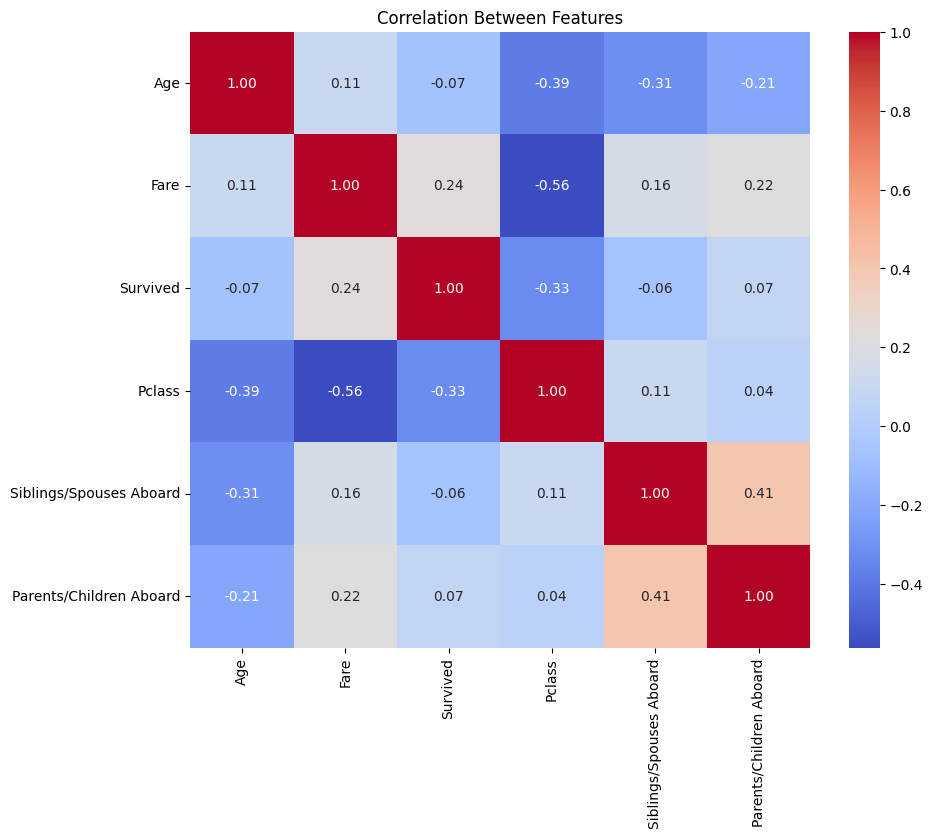

In [8]:
# Load the data from Power BI dataset
df = pd.DataFrame({
    'Age': df['Age'],
    'Fare': df['Fare'],
    'Survived': df['Survived'],
    'Pclass': df['Pclass'],
    'Siblings/Spouses Aboard': df['Siblings/Spouses Aboard'],
    'Parents/Children Aboard': df['Parents/Children Aboard']
})

# Drop duplicates
df = df.drop_duplicates()

# Calculating correlation matrix
corr = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

1. Age and Pclass (-0.39): A moderate negative correlation suggests that younger passengers tend to be in lower (numerically higher) passenger classes (e.g., 3rd class).
1. Fare and Pclass (-0.56): A strong negative correlation indicates that passengers in higher classes (numerically lower, e.g., 1st class) tend to pay higher fares. This is expected as higher classes generally offer better amenities and services.
1. Survived and Pclass (-0.32): This moderate negative correlation suggests that passengers in higher classes had a higher survival rate. This might reflect that higher class passengers had better access to lifeboats or other survival resources during the disaster.
1. Survived and Fare (0.24): A positive correlation indicates that passengers who paid higher fares had slightly higher survival rates, which might correlate with higher class or better access to emergency resources.
1. Siblings/Spouses Aboard and Parents/Children Aboard (0.41): This positive correlation shows that passengers with siblings or spouses on board also tended to have parents or children aboard. This might reflect families traveling together.
1. Age and Siblings/Spouses Aboard (-0.31), Age and Parents/Children Aboard (-0.21): These negative correlations suggest that older passengers were less likely to have either siblings/spouses or parents/children aboard, possibly reflecting older individuals traveling alone or with a spouse rather than as part of larger family units.


In [9]:
print(df.columns)


Index(['Age', 'Fare', 'Survived', 'Pclass', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard'],
      dtype='object')


# To normalize and apply Min-Max scaling to the Age and Fare columns

## Apply StandardScaler (Normalization)

In [10]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'Age' and 'Fare' columns
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


## Apply MinMaxScaler

In [11]:
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the 'Age' and 'Fare' columns
df[['Age', 'Fare']] = min_max_scaler.fit_transform(df[['Age', 'Fare']])


## Check the Transformed Data

In [12]:
print(df[['Age', 'Fare']].head())


        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


# Basic logistic regression model using Python's scikit-learn library

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/kaggle/input/titanic/titanic.csv')

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())

# Convert categorical variable 'Sex' to dummy variables
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Define the feature matrix and target vector
feature_cols = ['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Sex_male', 'Pclass']
X = df[feature_cols]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LogisticRegression(max_iter=400)  # Increased max_iter for convergence if needed
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7528089887640449
Confusion Matrix:
 [[97 14]
 [30 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.82       111
           1       0.73      0.55      0.63        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.75      0.75      0.74       178

